In [1]:
import torch

# test_inputs.pt ファイルの読み込み
test_inputs = torch.load('test_inputs.pt')
print("Loaded test_inputs:")
# print(test_inputs)

# test_outputs.pt ファイルの読み込み
test_outputs = torch.load('test_outputs.pt')
print("Loaded test_outputs:")
# print(test_outputs)

# test_targets.pt ファイルの読み込み
test_targets = torch.load('test_targets.pt')
print("Loaded test_targets:")
# print(test_targets)

# import pprint
# pprint.pprint(test_targets[0].squeeze())

Loaded test_inputs:
Loaded test_outputs:
Loaded test_targets:


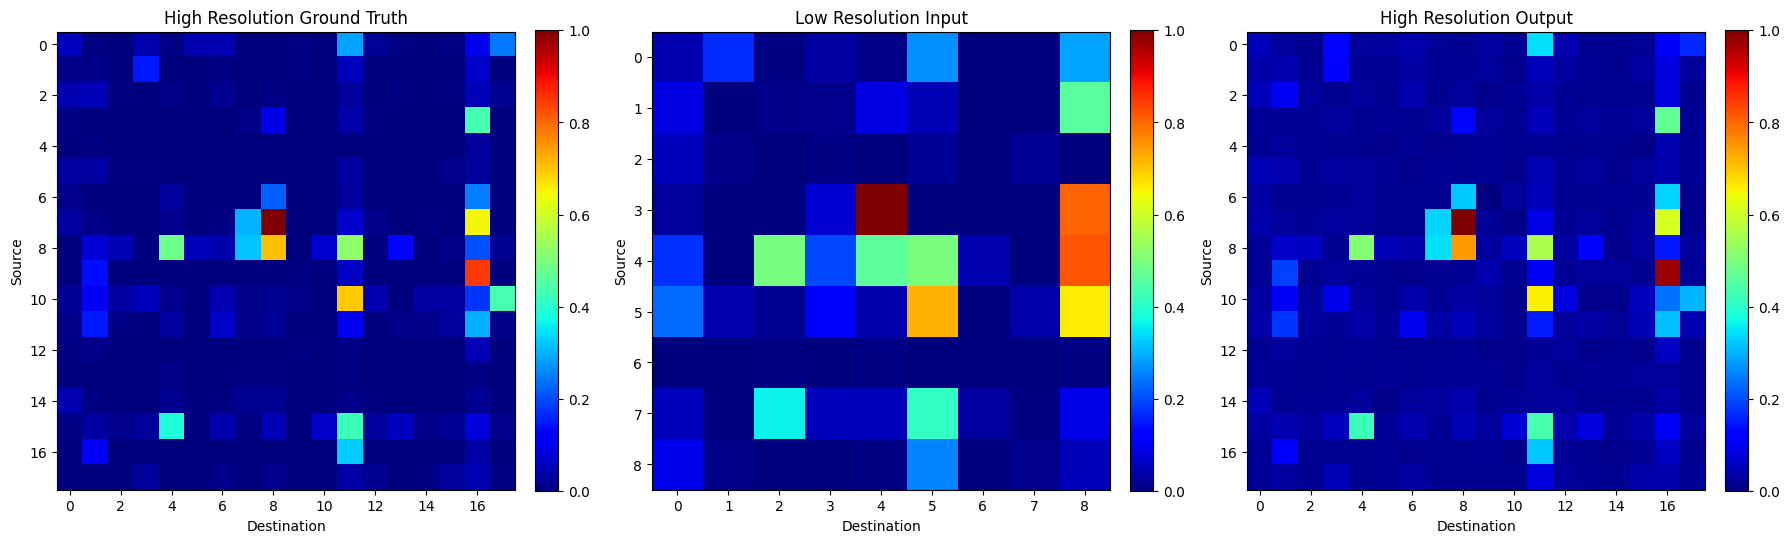

In [1]:
import torch
import matplotlib.pyplot as plt

def normalize_tensor(tensor):
    min_val = tensor.min()
    max_val = tensor.max()
    return (tensor - min_val) / (max_val - min_val)

def standardize_tensor(tensor):
    mean = tensor.mean()
    std = tensor.std()
    return (tensor - mean) / std

# 入力、ターゲット、出力データの読み込み
test_inputs = torch.load('test_inputs.pt')
test_outputs = torch.load('test_outputs.pt')
test_targets = torch.load('test_targets.pt')

# test_inputs = test_inputs[0].cpu()
# test_outputs = test_outputs[0].cpu()
# test_targets = test_targets[0].cpu()

# test_inputs = standardize_tensor(test_inputs[0]).cpu()
# test_outputs = standardize_tensor(test_outputs[0]).cpu()
# test_targets = standardize_tensor(test_targets[0]).cpu()

# データの正規化または標準化を統一して実行
test_inputs = normalize_tensor(test_inputs[0]).cpu()
test_outputs = normalize_tensor(test_outputs[0]).cpu()
test_targets = normalize_tensor(test_targets[0]).cpu()

# test_inputs = (test_inputs[0]).cpu()
# test_outputs = (test_outputs[0]).cpu()
# test_targets = (test_targets[0]).cpu()

# データの可視化
def plot_matrices(input_matrix, target_matrix, output_matrix):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    cax1 = axes[0].imshow(input_matrix, cmap='jet', interpolation='nearest')
    fig.colorbar(cax1, ax=axes[0], fraction=0.046, pad=0.04)
    axes[1].set_title('Low Resolution Input')
    axes[0].set_xlabel('Destination')
    axes[0].set_ylabel('Source')

    cax2 = axes[1].imshow(target_matrix, cmap='jet', interpolation='nearest')
    fig.colorbar(cax2, ax=axes[1], fraction=0.046, pad=0.04)
    axes[0].set_title('High Resolution Ground Truth')
    axes[1].set_xlabel('Destination')
    axes[1].set_ylabel('Source')

    cax3 = axes[2].imshow(output_matrix, cmap='jet', interpolation='nearest')
    fig.colorbar(cax3, ax=axes[2], fraction=0.046, pad=0.04)
    axes[2].set_title('High Resolution Output')
    axes[2].set_xlabel('Destination')
    axes[2].set_ylabel('Source')

    plt.tight_layout()
    plt.show()

# プロット
plot_matrices( test_targets.squeeze(), test_inputs.squeeze(), test_outputs.squeeze())

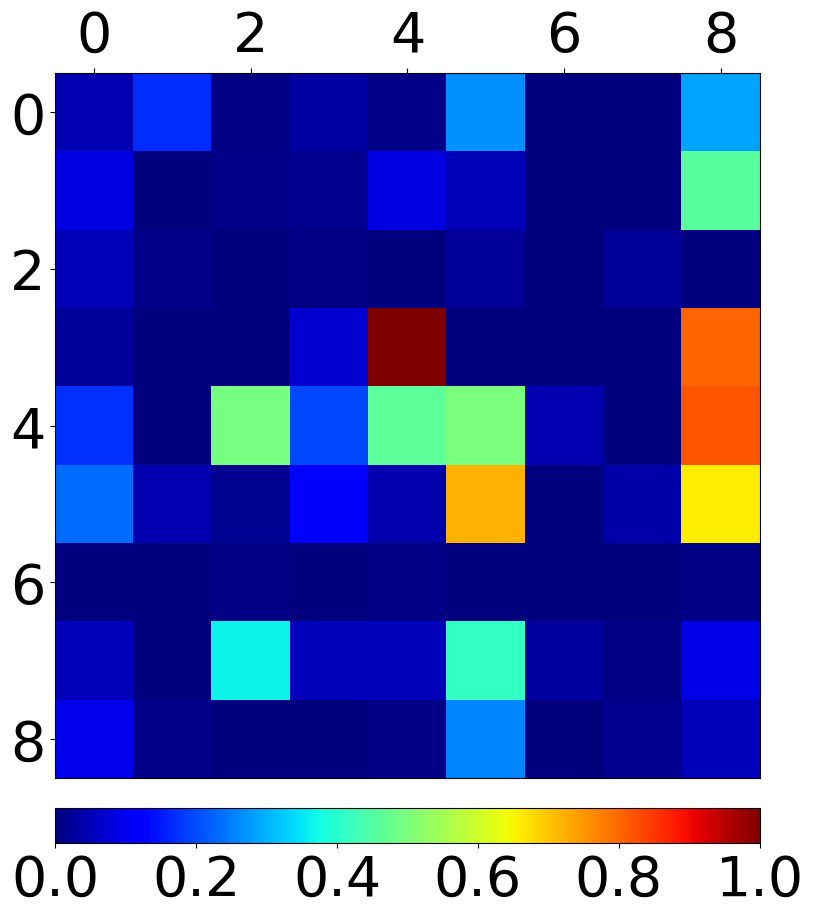

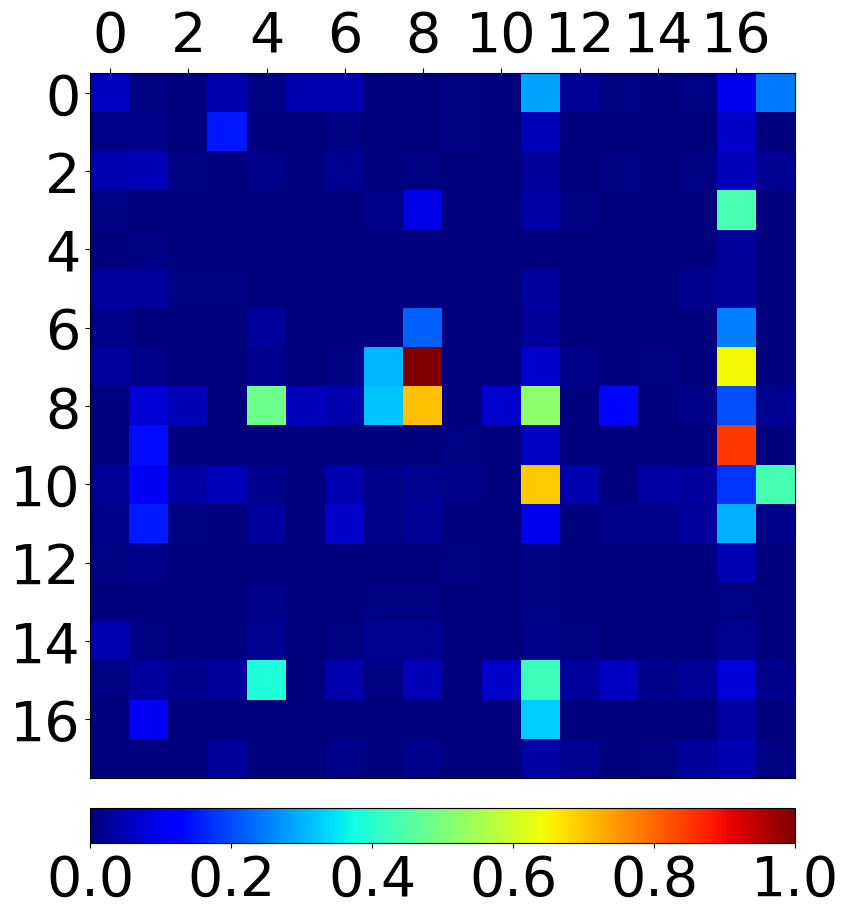

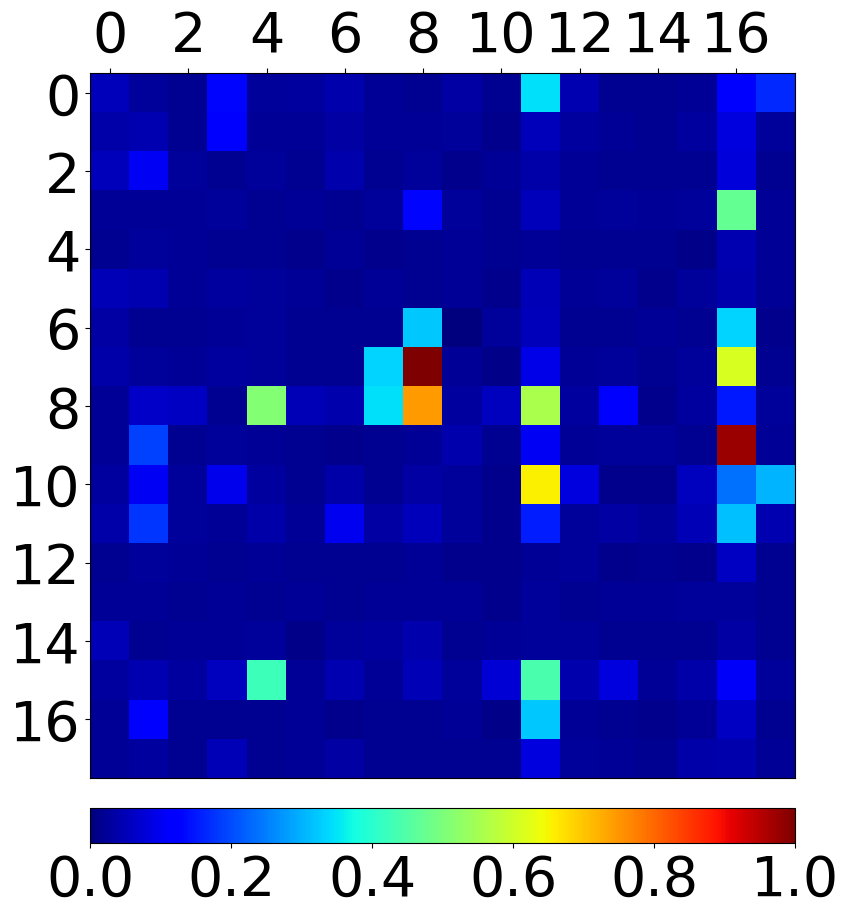

In [12]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

# データの可視化
def plot_matrix(matrix, title, filename):
    fig, ax = plt.subplots(figsize=(10, 10))
    cax = ax.imshow(matrix, cmap='jet', interpolation='nearest')
    
    # フォントサイズの設定
    ax.set_title(title, fontsize=18)
    ax.set_xlabel('', fontsize=40)
    ax.set_ylabel('', fontsize=40)
    
    # 横軸のティックラベルを上部に配置
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    
    # 軸ラベルのフォントサイズ
    ax.tick_params(axis='both', which='major', labelsize=40)
    
    # 縦軸と横軸のティックラベルを3刻みの整数に設定
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.yaxis.set_major_locator(MultipleLocator(2))
    
    # カラーバーを下部に配置
    divider = make_axes_locatable(ax)
    cax_cb = divider.append_axes("bottom", size="5%", pad=0.3)
    cbar = fig.colorbar(cax, cax=cax_cb, orientation='horizontal')
    
    # カラーバーのティックラベルのフォントサイズを変更
    cbar.ax.tick_params(labelsize=40)
    
    # カラーバーのティックラベルを0.2刻みに設定
    ticks = np.arange(0, 1.2, 0.2)
    cbar.set_ticks(ticks)
    cbar.set_ticklabels([f'{t:.1f}' for t in ticks])

    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.show(fig)

# 各行列を個別にプロット
plot_matrix(test_inputs.squeeze(), '', 'test_inputs.png')
plot_matrix(test_targets.squeeze(), '', 'test_targets.png')
plot_matrix(test_outputs.squeeze(), '', 'test_outputs.png')


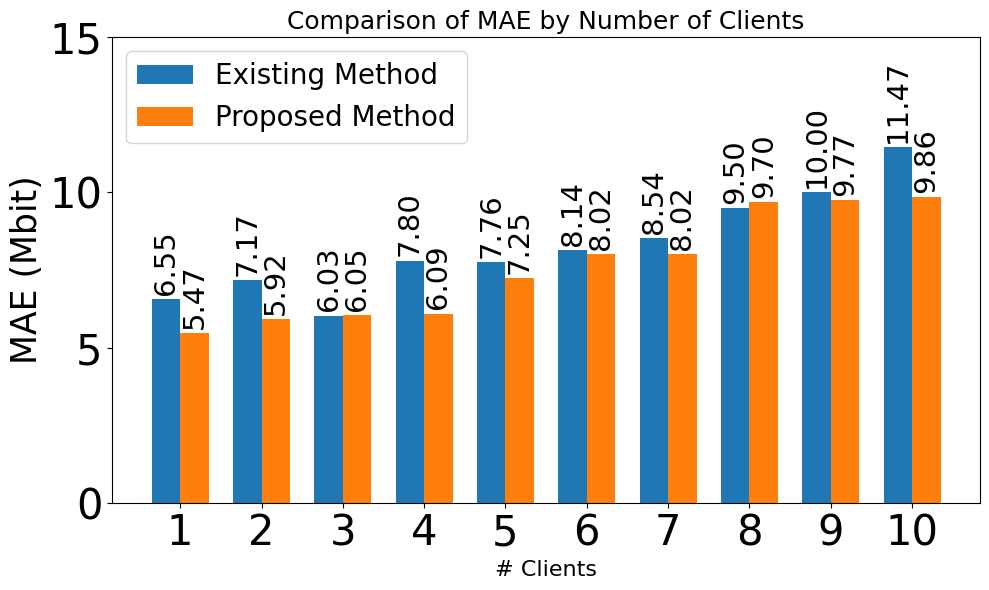

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# データ
clients = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
existing_method = [6.555, 7.169, 6.034, 7.804, 7.758, 8.136, 8.537, 9.496, 10.004, 11.472]
proposed_method = [5.470, 5.922, 6.053, 6.095, 7.249, 8.023, 8.023, 9.695, 9.765, 9.856]

# グラフの作成
x = np.arange(len(clients))  # クライアント数の位置
width = 0.35  # 棒の幅

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, existing_method, width, label='Existing Method')
rects2 = ax.bar(x + width/2, proposed_method, width, label='Proposed Method')

# グラフのラベル付け
ax.set_xlabel('# Clients', fontsize=16)
ax.set_ylabel('MAE (Mbit)', fontsize=25)
ax.set_title('Comparison of MAE by Number of Clients', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(clients, fontsize=30)
ax.legend(fontsize=20, loc='upper left')

# Y軸の範囲を設定
ax.set_ylim(0, 15)

# Y軸のティックラベルのフォントサイズを設定
ax.tick_params(axis='y', labelsize=30)

# 数値ラベルを棒グラフの上に表示
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=21, rotation=90)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig('comparison_graph.png')
plt.show()
